# <center>Assignment 4 Part 1</center>
##### <center>Robert Earle (B00758329) & Richa Khatri (B00792218)</center><center>CSCI 4155</center>
<br>

## 1. Size Computations

### a)

We have a kernel with size 5x5, and our input has 32 channels. We are considering the number of weights produced by a single filter, so our result is:  
> $5\times5\times32 = 800$  

There will be 800 weights in our filter.

### b)

The size of output is $8\times8\times64$, which means that we have 64 feature maps, which means 64 filters were applied.

## 2. Visualizing Filters

### a)

The filters we used are as follows:
<br />  
**Horizonatal Edge Detection**:
> Simple :$$\begin{bmatrix} -1 & -1 & -1 & -1 & -1 \\ -1 & -1 & -1 & -1 & -1 \\ 4 & 4 & 4 & 4 & 4 \\ -1 & -1 & -1 & -1 & -1 \\ -1 & -1 & -1 & -1 & -1 \end{bmatrix}$$  
Sobel :$$\begin{bmatrix} -0.1 & -0.4 & -0.5 & -0.4 & -0.1 \\ -0.2 & -0.5 & -1 & -0.5 & -0.2 \\ 0 & 0 & 0 & 0 & 0 \\ 0.2 & 0.5 & 1 & 0.5 & 0.2 \\ 0.1 & 0.4 & 0.5 & 0.4 & 0.1 \end{bmatrix}$$
<br />  

**Vertical Edge Detection**  
> Simple :$$\begin{bmatrix} -1 & -1 & 4 & -1 & -1 \\ -1 & -1 & 4 & -1 & -1 \\ -1 & -1 & 4 & -1 & -1 \\ -1 & -1 & 4 & -1 & -1 \\ -1 & -1 & 4 & -1 & -1 \end{bmatrix}$$  
Sobel :$$\begin{bmatrix} -0.1 & -0.2 & 0 & 0.2 & 0.1 \\ -0.4 & -0.5 & 0 & 0.5 & 0.4 \\ -0.5 & -1 & 0 & 1 & 0.5 \\ -0.4 & -0.5 & 0 & 0.5 & 0.4 \\ -0.1 & -0.2 & 0 & 0.2 & 0.1 \end{bmatrix}$$
<br />  

**Diagonal (Bottom Left to Top Right) Edge Detection**  
> Simple :$$\begin{bmatrix} -1 & -1 & -1 & -1 & 4 \\ -1 & -1 & -1 & 4 & -1 \\ -1 & -1 & 4 & -1 & -1 \\ -1 & 4 & -1 & -1 & -1 \\ 4 & -1 & -1 & -1 & -1 \end{bmatrix}$$  
Sobel :$$\begin{bmatrix} -0.1 & -0.2 & -0.4 & -0.5 & 0 \\ -0.2 & -0.4 & -0.5 & 0 & 0.5 \\ -0.4 & -0.5 & 0 & 0.5 & 0.4 \\ -0.5 & 0 & 0.5 & 0.4 & 0.2 \\ 0 & 0.5 & 0.4 & 0.2 & 0.1 \end{bmatrix}$$
<br />  

**Diagonal (Top Left to Bottom Right) Edge Detection**  
> Simple :$$\begin{bmatrix} 4 & -1 & -1 & -1 & -1 \\ -1 & 4 & -1 & -1 & -1 \\ -1 & -1 & 4 & -1 & -1 \\ -1 & -1 & -1 & 4 & -1 \\ -1 & -1 & -1 & -1 & 4 \end{bmatrix}$$  
Sobel :$$\begin{bmatrix} 0 & -0.5 & -0.4 & -0.2 & -0.1 \\ 0.5 & 0 & -0.5 & -0.4 & -0.2 \\ 0.4 & 0.5 & 0 & -0.5 & -0.4 \\ 0.2 & 0.4 & 0.5 & 0 & -0.5 \\ 0.1 & 0.2 & 0.4 & 0.5 & 0 \end{bmatrix}$$
<br />  

We used 5x5 filters instead of the 3x3 shown in class because we used a larger image and the larger filters worked more effectively to highlight their respective edge types.  

After reading about Sobel Filters we also tried experimenting with these as well (0 along the axis of interest; offsetting positive & negative weights on either side. Roughly simulates the image gradient that we are looking for at each point). We found that these filters to be more effective in highlighting the edges of interest.  

In [0]:
# -------------- Import cats vs dogs dataset, organizing

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

--2019-03-27 22:12:46--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  71.6MB/s    in 0.9s    

2019-03-27 22:12:47 (71.6 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



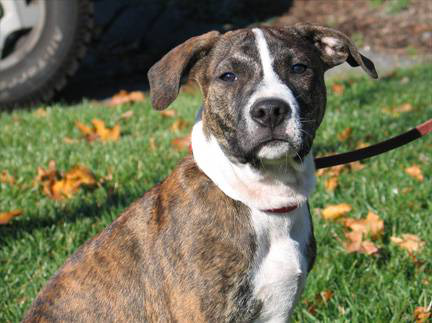

In [0]:
# -------------- Picture of dog before filter
train_dog_fnames = os.listdir(train_dogs_dir)
dogFilename = train_dogs_dir + "/" + train_dog_fnames[25]
dimage = Image.open(dogFilename)
dimage

----------------- Simple Edge Detection Filters
Horizontal Edge Detector


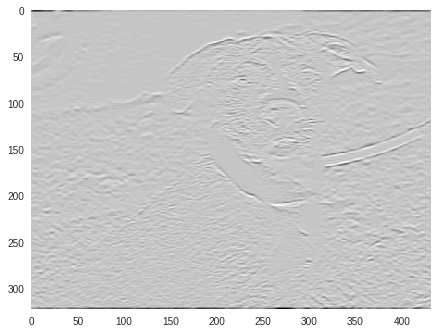

Vertical Edge Detector


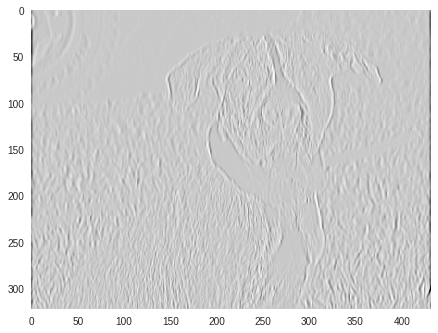

Diagonal (Bottom Left to Top Right) Detector


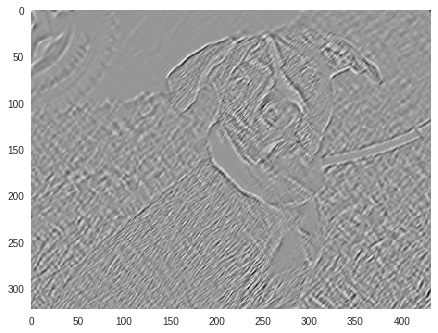

Diagonal (Top Left to Bottom Right) Detector


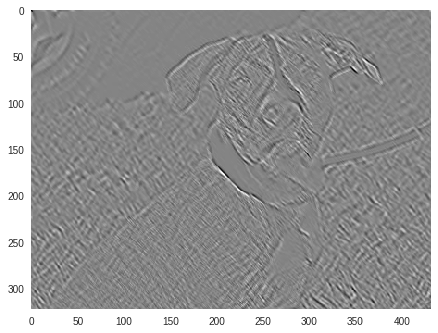


----------------- Sobel Edge Detection Filters
Horizontal Edge Detector


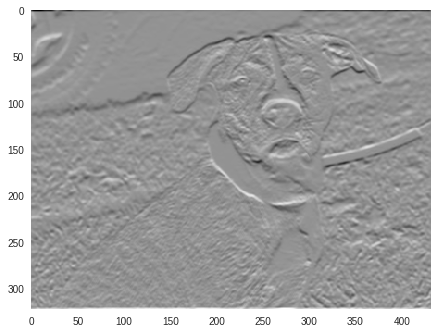

Vertical Edge Detector


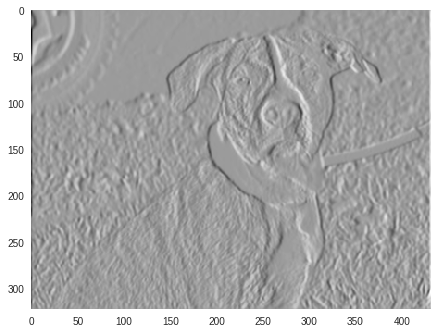

Diagonal (Bottom Left to Top Right) Detector


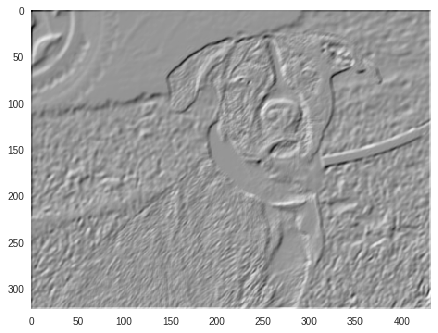

Diagonal (Top Left to Bottom Right) Detector


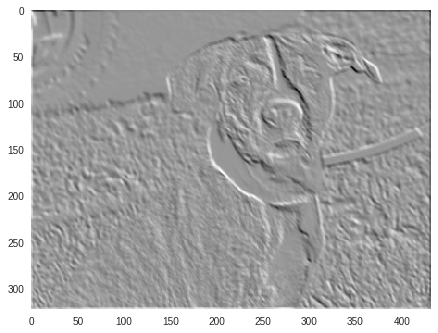

In [0]:
# -------------- Creating and visualizing filters
# Created visualizations based on info from https://stackoverflow.com/a/53146948

import tensorflow as tf

# Imports image, converts to grayscale tensor, converts tensor to np.Array
dimage = Image.open(dogFilename)
dimage = tf.image.rgb_to_grayscale(dimage)
dimage = tf.Session().run(dimage)
img = np.expand_dims(dimage, -1)


# Creating filters
horizontal_edge = np.array([[-1., -1., -1., -1., -1.],
                            [-1., -1., -1., -1., -1.],
                            [ 4.,  4.,  4.,  4.,  4.],
                            [-1., -1., -1., -1., -1.],
                            [-1., -1., -1., -1., -1.]])

vertical_edge = np.array([[-1., -1.,  4., -1., -1.],
                          [-1., -1.,  4., -1., -1.],
                          [-1., -1.,  4., -1., -1.],
                          [-1., -1.,  4., -1., -1.],
                          [-1., -1.,  4., -1., -1.]])

diagonal_edge_1 = np.array([[-1., -1., -1., -1.,  4.],
                            [-1., -1., -1.,  4., -1.],
                            [-1., -1.,  4., -1., -1.],
                            [-1.,  4., -1., -1., -1.],
                            [ 4., -1., -1., -1., -1.]])

diagonal_edge_2 = np.array([[ 4., -1., -1., -1., -1.],
                            [-1.,  4., -1., -1., -1.],
                            [-1., -1.,  4., -1., -1.],
                            [-1., -1., -1.,  4., -1.],
                            [-1., -1., -1., -1.,  4.]])


sobel_horizontal_edge = np.array([[-0.1, -0.4 , -0.5 , -0.4 , -0.1],
                            [-0.2, -0.5 , -1.  , -0.5 , -0.2],
                            [ 0. ,  0.  ,  0.  ,  0.  ,  0. ],
                            [ 0.2,  0.5 ,  1.  ,  0.5 ,  0.2],
                            [ 0.1,  0.4 ,  0.5 ,  0.4 ,  0.1]])

sobel_vertical_edge = np.array([[-0.1, -0.2 ,  0.  ,  0.2 ,  0.1],
                          [-0.4, -0.5 ,  0.  ,  0.5 ,  0.4],
                          [-0.5, -1.  ,  0.  ,  1.  ,  0.5],
                          [-0.4, -0.5 ,  0.  ,  0.5 ,  0.4],
                          [-0.1, -0.2 ,  0.  ,  0.2 ,  0.1]])

sobel_diagonal_edge_1 = np.array([[-0.1, -0.2, -0.4, -0.5,  0.],
                            [-0.2, -0.4, -0.5,  0. , 0.5],
                            [-0.4, -0.5,  0. , 0.5 , 0.4],
                            [-0.5,  0. , 0.5 , 0.4 , 0.2],
                            [ 0. , 0.5 , 0.4 , 0.2 , 0.1]])

sobel_diagonal_edge_2 = np.array([[0. , -0.5, -0.4, -0.2, -0.1],
                            [0.5,  0. , -0.5, -0.4, -0.2],
                            [0.4, 0.5 ,  0. , -0.5, -0.4],
                            [0.2, 0.4 , 0.5 ,  0. , -0.5],
                            [0.1, 0.2 , 0.4 , 0.5 ,  0. ]])

filters = np.concatenate([[horizontal_edge], [vertical_edge], [diagonal_edge_1], 
                         [diagonal_edge_2], [sobel_horizontal_edge], 
                         [sobel_vertical_edge], [sobel_diagonal_edge_1], 
                         [sobel_diagonal_edge_2]])
filters = np.expand_dims(filters, -1)
filters = filters.transpose(1, 2, 3, 0)

# Applying convolution filters to our image
ans = tf.nn.conv2d((img / 255.0).astype('float32'),
                   filters,
                   strides=[1, 1, 1, 1],
                   padding='SAME')

with tf.Session() as sess:
    ans_np = sess.run(ans)

filtered1 = ans_np[0, ..., 0]
filtered2 = ans_np[0, ..., 1]
filtered3 = ans_np[0, ..., 2]
filtered4 = ans_np[0, ..., 3]
filtered5 = ans_np[0, ..., 4]
filtered6 = ans_np[0, ..., 5]
filtered7 = ans_np[0, ..., 6]
filtered8 = ans_np[0, ..., 7]

print("----------------- Simple Edge Detection Filters")
print("Horizontal Edge Detector")
plt.grid(b=None)
plt.imshow(filtered1)
plt.show()

print("Vertical Edge Detector")
plt.grid(b=None)
plt.imshow(filtered2)
plt.show()

print("Diagonal (Bottom Left to Top Right) Detector")
plt.grid(b=None)
plt.imshow(filtered3)
plt.show()

print("Diagonal (Top Left to Bottom Right) Detector")
plt.grid(b=None)
plt.imshow(filtered4)
plt.show()

print("\n----------------- Sobel Edge Detection Filters")
print("Horizontal Edge Detector")
plt.grid(b=None)
plt.imshow(filtered5)
plt.show()

print("Vertical Edge Detector")
plt.grid(b=None)
plt.imshow(filtered6)
plt.show()

print("Diagonal (Bottom Left to Top Right) Detector")
plt.grid(b=None)
plt.imshow(filtered7)
plt.show()

print("Diagonal (Top Left to Bottom Right) Detector")
plt.grid(b=None)
plt.imshow(filtered8)
plt.show()


### b)

No Filter


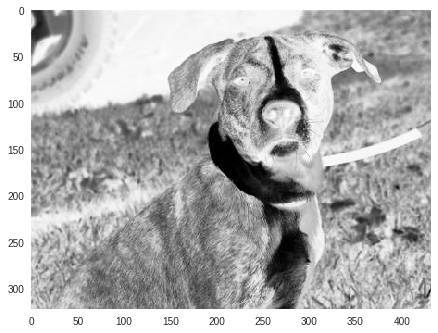

Gaussian Filter


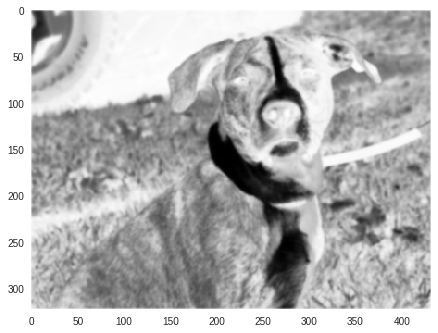

In [0]:
no_filter = np.array([[0.,  0.,  0., 0.,  0.],
                      [0.,  0.,  0., 0.,  0.],
                      [0.,  0.,  1., 0.,  0.],
                      [0.,  0.,  0., 0.,  0.],
                      [0.,  0.,  0., 0.,  0.]])

gaussian_filter = np.array([[0.003663003,  0.014652014,  0.025641025, 0.014652014,  0.003663003],
                            [0.014652014,  0.058608058,  0.095238095, 0.058608058,  0.014652014],
                            [ 0.025641025, 0.095238095,  0.15018315,  0.095238095,  0.025641025],
                            [0.014652014,  0.058608058,  0.095238095, 0.058608058,  0.014652014],
                            [0.003663003,  0.014652014,  0.025641025, 0.014652014,  0.003663003]])

filters = np.concatenate([[no_filter], [gaussian_filter]])
filters = np.expand_dims(filters, -1)
filters = filters.transpose(1, 2, 3, 0)

# print(filters)

# Applying convolution filters to our image
ans = tf.nn.conv2d((img / 255.0).astype('float32'),
                   filters,
                   strides=[1, 1, 1, 1],
                   padding='SAME')

with tf.Session() as sess:
    ans_np = sess.run(ans)

filtered1 = ans_np[0, ..., 0]
filtered2 = ans_np[0, ..., 1]

print("No Filter")
plt.grid(b=None)
plt.imshow(filtered1)
plt.show()

print("Gaussian Filter")
plt.grid(b=None)
plt.imshow(filtered2)
plt.show()

We use a gaussian blur to reduce the noise in our image. Where the filters shown in (a) work to highlight the edges in our image, the gaussian filter smooths these edges and instead focusses on highlighting changes that occur on a wide scale across the whole image.

## 3. Data Augmentation

### a)

Data augmentation refers to the process of applying transformations to pre-existing data, so as to provide our model with more training samples without having to go out and collect brand new data. While a slight rotation, shift, or flip along the y axis might not affect a person's ability to classify an image, these same transformations can completely alter the vector representation (and thus, by extension, our model's understanding) of an image. Thus by applying transformations to previously used images from our dataset we are creating new data that can improve our model's effectiveness.

#### i) 
On MNIST we could apply a slight rotation (-10 degrees <= rotation <= 10 degrees, at random) to each of the letters in our dataset. This would be suitable for MNIST data, as a +- 10 degree rotation to any of the 10 integer values will still be recognizable as that same integer (ie. applying this transformation should not alter the intrinsic properties that belong to any of the integers). This would also be useful for improving our model's understanding of integers people can sometimes write their numbers at weird angles.

#### ii)  
On dogs vs cats we could apply a flip on the y-axis. This tranformation wouldn't be appropriate for MNIST (for example, a flipped 7 no longer resembles a 7), but a dog or cat is still recognizable as such when its image has been flipped horizontally, so this approach is acceptable here. This transformation would be helpful to our model because it allows us to recognize the same dog facing on the left or on the right. Also, when taking a selfie the camera on most phones inverts the image by default, so this might help our algorithm recognize dogs that appear in selfies with their owners!

### b)

x_train shape: (60000, 28, 28)
Number of images in x_train 60000
Number of images in x_test 10000


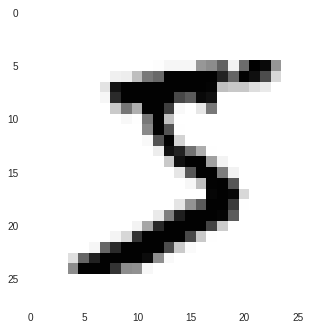

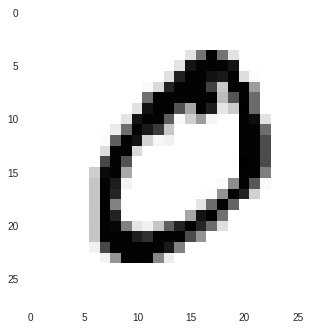

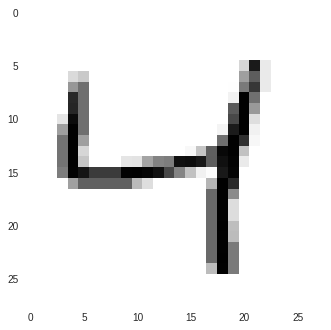

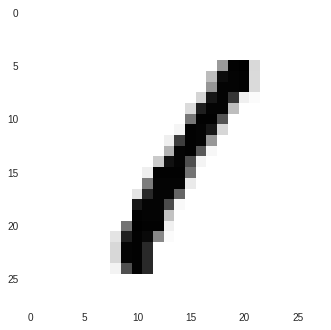

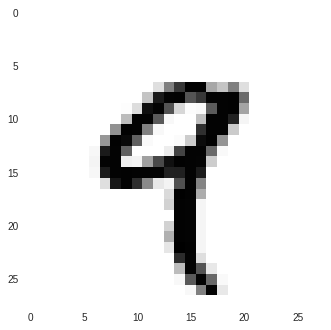

Rotation = 2


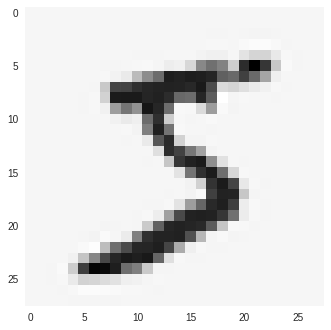

Rotation = -9


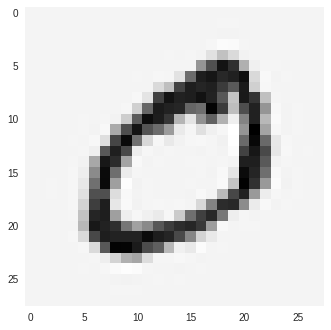

Rotation = 4


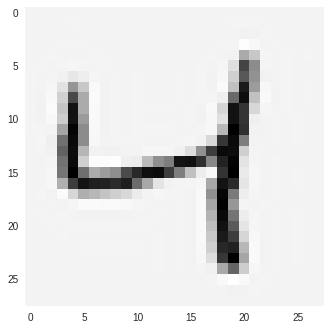

Rotation = -6


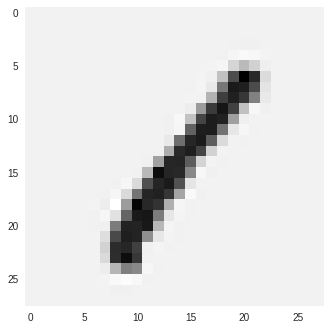

Rotation = -9


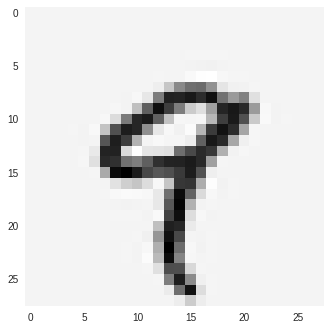

In [0]:
import tensorflow as tf
from scipy.ndimage import rotate
import scipy.misc
import random

local_zip = 'data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train2 = x_train.copy()

for img in x_train2[:5]:
  plt.grid(b=None)
  img = img.reshape([28,28])
  plt.imshow(img)
  plt.show()
  
for img in x_train2[:5]:
  curr_random = random.randint(-10,10)
  if curr_random == 0:
    curr_random = 10
  print("Rotation = " + str(curr_random))
  img = rotate(img, curr_random, reshape=False)
  plt.grid(b=None)
  img = img.reshape([28,28])
  plt.imshow(img)
  plt.show()

## 4. Custom CNN Classifier

In [0]:
!wget -O data.zip https://www.dropbox.com/s/8y0fwnulpxssftv/data.zip?dl=0
  
import os
import zipfile

local_zip = 'data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

!ls /tmp

--2019-04-02 14:40:00--  https://www.dropbox.com/s/8y0fwnulpxssftv/data.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.1, 2620:100:6031:1::a27d:5101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/8y0fwnulpxssftv/data.zip [following]
--2019-04-02 14:40:02--  https://www.dropbox.com/s/raw/8y0fwnulpxssftv/data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb220676e4ba2a57ed00299b7ca.dl.dropboxusercontent.com/cd/0/inline/AeSfsyXlulnpJrjTYp6g5UySJIG17KDi6wN1S-3f8xhe8Sq_GUuzdLBIAM-oW_IGR3F1dsdfaIjfM9-eka2wmeBM6Xi0F7kUsB_N5pkVidgL17LjrVRBYM9d39oDrSxLfQA/file# [following]
--2019-04-02 14:40:03--  https://ucb220676e4ba2a57ed00299b7ca.dl.dropboxusercontent.com/cd/0/inline/AeSfsyXlulnpJrjTYp6g5UySJIG17KDi6wN1S-3f8xhe8Sq_GUuzdLBIAM-oW_IGR3F1dsdfaIjfM9-eka2wmeBM6Xi0F7kUsB_N5pkVidgL17LjrVRBYM

In [0]:
"""
We used the tutorial found here in creating our model: https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
"""

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

def train_conv_neural_net(curr_activation='relu', curr_weight_init='glorot_uniform', curr_num_layers=1, curr_optimizer='rmsprop'):
  
  img_width, img_height = 150, 150

  train_data_dir = '/tmp/data/train'
  validation_data_dir = '/tmp/data/validation'
  nb_train_samples = 1000
  nb_validation_samples = 800
  epochs = 50
  batch_size = 16

  if K.image_data_format() == 'channels_first':
      input_shape = (3, img_width, img_height)
  else:
      input_shape = (img_width, img_height, 3)

  model = Sequential()
  
  for i in range(curr_num_layers):
    model.add(Conv2D(32, (3, 3), input_shape=input_shape, kernel_initializer=curr_weight_init))
    model.add(Activation(curr_activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(64, kernel_initializer=curr_weight_init))
  model.add(Activation(curr_activation))
  model.add(Dropout(0.5))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))

  model.compile(loss='binary_crossentropy',
                optimizer=curr_optimizer,
                metrics=['accuracy'])

  train_datagen = ImageDataGenerator(
      rescale=1. / 255,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

  test_datagen = ImageDataGenerator(rescale=1. / 255)

  train_generator = train_datagen.flow_from_directory(
      train_data_dir,
      target_size=(img_width, img_height),
      batch_size=batch_size,
      class_mode='binary')

  validation_generator = test_datagen.flow_from_directory(
      validation_data_dir,
      target_size=(img_width, img_height),
      batch_size=batch_size,
      class_mode='binary')

  model.fit_generator(
      train_generator,
      steps_per_epoch=nb_train_samples // batch_size,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=nb_validation_samples // batch_size)

  outfile = "weights_+" + curr_activation + "_" + curr_weight_init + "_" + str(curr_num_layers) + "_" + curr_optimizer + ".h5"
  model.save_weights(outfile)

Using TensorFlow backend.


**Optimizers**

In [0]:
train_conv_neural_net()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
62/62 [==============================] - 47s 763ms/step - loss: 1.3937 - acc: 0.5504 - val_loss: 0.6808 - val_acc: 0.5425
Epoch 2/50
62/62 [==============================] - 45s 731ms/step - loss: 0.6815 - acc: 0.5746 - val_loss: 0.6890 - val_acc: 0.5480
Epoch 3/50
62/62 [==============================] - 45s 722ms/step - loss: 0.6805 - acc: 0.6371 - val_loss: 0.6693 - val_acc: 0.5871
Epoch 4/50
62/62 [==============================] - 45s 726ms/step - loss: 0.6414 - acc: 0.6280 - val_loss: 0.6505 - val_acc: 0.5922
Epoch 5/50
62/62 [==============================] - 45s 729ms/step - loss: 0.6487 - acc: 0.6260 - val_loss: 0.6459 - val_acc: 0.6500
Epoch 6/50
62/62

In [0]:
train_conv_neural_net(curr_optimizer='sgd')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
62/62 [==============================] - 46s 744ms/step - loss: 0.7125 - acc: 0.5030 - val_loss: 0.6929 - val_acc: 0.5075
Epoch 2/50
62/62 [==============================] - 43s 700ms/step - loss: 0.6935 - acc: 0.4960 - val_loss: 0.6931 - val_acc: 0.4962
Epoch 3/50
62/62 [==============================] - 43s 700ms/step - loss: 0.6928 - acc: 0.5091 - val_loss: 0.6921 - val_acc: 0.5126
Epoch 4/50
62/62 [==============================] - 43s 694ms/step - loss: 0.6931 - acc: 0.4960 - val_loss: 0.6929 - val_acc: 0.4823
Epoch 5/50
62/62 [==============================] - 43s 692ms/step - loss: 0.6921 - acc: 0.5262 - val_loss: 0.6919 - val_acc: 0.5487
Epoch 6/50
62/62 [==============================] - 43s 689ms/step - loss: 0.6910 - acc: 0.5282 - val_loss: 0.6911 - val_acc: 0.5606
Epoch 7/50
62/62 [==============================] - 43s 701ms/step - loss: 0.6922 - acc: 0.5181 - val_loss: 0.6910 - v

In [0]:
train_conv_neural_net(curr_optimizer='adam')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
62/62 [==============================] - 49s 785ms/step - loss: 1.0804 - acc: 0.5161 - val_loss: 0.6692 - val_acc: 0.5663
Epoch 2/50
62/62 [==============================] - 47s 752ms/step - loss: 0.6847 - acc: 0.5766 - val_loss: 0.6318 - val_acc: 0.6301
Epoch 3/50
62/62 [==============================] - 47s 754ms/step - loss: 0.6568 - acc: 0.5968 - val_loss: 0.6285 - val_acc: 0.6301
Epoch 4/50
62/62 [==============================] - 46s 750ms/step - loss: 0.6397 - acc: 0.6371 - val_loss: 0.6237 - val_acc: 0.6326
Epoch 5/50
62/62 [==============================] - 47s 750ms/step - loss: 0.6141 - acc: 0.6724 - val_loss: 0.6002 - val_acc: 0.6887
Epoch 6/50
62/62 [==============================] - 46s 749ms/step - loss: 0.6219 - acc: 0.6452 - val_loss: 0.6170 - val_acc: 0.6540
Epoch 7/50
62/62 [==============================] - 47s 759ms/step - loss: 0.6162 - acc: 0.6784 - val_loss: 0.5820 - v

In [0]:
train_conv_neural_net(curr_optimizer='adadelta')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
62/62 [==============================] - 51s 828ms/step - loss: 0.9272 - acc: 0.4688 - val_loss: 0.6939 - val_acc: 0.4913
Epoch 2/50
62/62 [==============================] - 49s 793ms/step - loss: 0.7026 - acc: 0.4950 - val_loss: 0.6937 - val_acc: 0.5013
Epoch 3/50
62/62 [==============================] - 50s 803ms/step - loss: 4.3960 - acc: 0.4879 - val_loss: 7.2824 - val_acc: 0.5088
Epoch 4/50
62/62 [==============================] - 49s 794ms/step - loss: 5.8226 - acc: 0.4929 - val_loss: 7.9369 - val_acc: 0.5076
Epoch 5/50
62/62 [==============================] - 50s 800ms/step - loss: 6.1278 - acc: 0.5121 - val_loss: 8.0513 - val_acc: 0.5000
Epoch 6/50
62/62 [==============================] - 50s 800ms/step - loss: 6.5447 - acc: 0.4849 - val_loss: 8.3565 - val_acc: 0.4811
Epoch 7/50
62/62 [==============================] - 49s 795ms/step - loss: 5.4925 - acc: 0.5101 - val_loss: 8.1094 - v

In [0]:
train_conv_neural_net(curr_optimizer='adagrad')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
62/62 [==============================] - 47s 755ms/step - loss: 7.5049 - acc: 0.5222 - val_loss: 8.2404 - val_acc: 0.4888
Epoch 2/50
62/62 [==============================] - 44s 714ms/step - loss: 8.0041 - acc: 0.4980 - val_loss: 8.1201 - val_acc: 0.4962
Epoch 3/50
62/62 [==============================] - 45s 721ms/step - loss: 8.0984 - acc: 0.4970 - val_loss: 7.7741 - val_acc: 0.5177
Epoch 4/50
62/62 [==============================] - 45s 728ms/step - loss: 8.0099 - acc: 0.5030 - val_loss: 8.1405 - val_acc: 0.4949
Epoch 5/50
62/62 [==============================] - 44s 714ms/step - loss: 8.5626 - acc: 0.4688 - val_loss: 8.0188 - val_acc: 0.5025
Epoch 6/50
62/62 [==============================] - 44s 713ms/step - loss: 7.5328 - acc: 0.5323 - val_loss: 8.1812 - val_acc: 0.4924
Epoch 7/50
62/62 [==============================] - 44s 711ms/step - loss: 7.7662 - acc: 0.5181 - val_loss: 7.8555 - v

**Activations**

In [0]:
train_conv_neural_net(curr_activation='softmax')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/50
62/62 [==============================] - 65s 1s/step - loss: 0.7008 - acc: 0.5091 - val_loss: 0.6932 - val_acc: 0.5125
Epoch 2/50
62/62 [==============================] - 62s 1s/step - loss: 0.6969 - acc: 0.4829 - val_loss: 0.6957 - val_acc: 0.4823
Epoch 3/50
62/62 [==============================] - 63s 1s/step - loss: 0.6973 - acc: 0.4829 - val_loss: 0.6933 - val_acc: 0.5038
Epoch 4/50
62/62 [==============================] - 63s 1s/step - loss: 0.6946 - acc: 0.5020 - val_loss: 0.6937 - val_acc: 0.4924
Epoch 5/50
62/62 [==============================] - 62s 1s/step - loss: 0.6936 - acc: 0.5081 - val_loss: 0.6931 - val_acc: 0.5062
Epoch 6/50
62/62 [==============================] - 62s 1s/step - loss: 0.6943 - acc: 0.4980 - val_loss: 0.6930 - val_acc: 0.5126
Epoch 7/50
62/62 [==============================] - 62s 1s

In [0]:
train_conv_neural_net(curr_activation='elu')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
62/62 [==============================] - 51s 823ms/step - loss: 7.8256 - acc: 0.5000 - val_loss: 7.9911 - val_acc: 0.4988
Epoch 2/50
62/62 [==============================] - 49s 786ms/step - loss: 8.0033 - acc: 0.4980 - val_loss: 7.9511 - val_acc: 0.5013
Epoch 3/50
62/62 [==============================] - 50s 803ms/step - loss: 7.9551 - acc: 0.5010 - val_loss: 7.9511 - val_acc: 0.5013
Epoch 4/50
62/62 [==============================] - 49s 787ms/step - loss: 7.9873 - acc: 0.4990 - val_loss: 7.7699 - val_acc: 0.5126
Epoch 5/50
62/62 [==============================] - 49s 788ms/step - loss: 7.8426 - acc: 0.5081 - val_loss: 8.1505 - val_acc: 0.4888
Epoch 6/50
62/62 [==============================] - 49s 788ms/step - loss: 8.0033 - acc: 0.4980 - val_loss: 7.9309 - val_acc: 0.5025
Epoch 7/50
62/62 [==============================] - 49s 787ms/step - loss: 8.1158 - acc: 0.4909 - val_loss: 8.0316 - v

In [0]:
train_conv_neural_net(curr_activation='tanh')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
62/62 [==============================] - 48s 778ms/step - loss: 1.4405 - acc: 0.4940 - val_loss: 0.7933 - val_acc: 0.5225
Epoch 2/50
62/62 [==============================] - 47s 750ms/step - loss: 0.9110 - acc: 0.4808 - val_loss: 0.6932 - val_acc: 0.5063
Epoch 3/50
62/62 [==============================] - 46s 749ms/step - loss: 0.8513 - acc: 0.4899 - val_loss: 0.6930 - val_acc: 0.5126
Epoch 4/50
62/62 [==============================] - 46s 744ms/step - loss: 0.8616 - acc: 0.4879 - val_loss: 0.6969 - val_acc: 0.4937
Epoch 5/50
62/62 [==============================] - 47s 751ms/step - loss: 0.8177 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5025
Epoch 6/50
62/62 [==============================] - 47s 752ms/step - loss: 0.8129 - acc: 0.4859 - val_loss: 0.6953 - val_acc: 0.5025
Epoch 7/50
62/62 [==============================] - 47s 751ms/step - loss: 0.7964 - acc: 0.4909 - val_loss: 0.6935 - v

In [0]:
train_conv_neural_net(curr_activation='sigmoid')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
62/62 [==============================] - 49s 783ms/step - loss: 1.2272 - acc: 0.5101 - val_loss: 0.9036 - val_acc: 0.5088
Epoch 2/50
62/62 [==============================] - 46s 745ms/step - loss: 0.8203 - acc: 0.5101 - val_loss: 0.7016 - val_acc: 0.4987
Epoch 3/50
62/62 [==============================] - 46s 742ms/step - loss: 0.7560 - acc: 0.4859 - val_loss: 0.6945 - val_acc: 0.5025
Epoch 4/50
62/62 [==============================] - 46s 741ms/step - loss: 0.7383 - acc: 0.5010 - val_loss: 0.6929 - val_acc: 0.5126
Epoch 5/50
62/62 [==============================] - 46s 749ms/step - loss: 0.7423 - acc: 0.4748 - val_loss: 0.6932 - val_acc: 0.4975
Epoch 6/50
62/62 [==============================] - 46s 745ms/step - loss: 0.7133 - acc: 0.5181 - val_loss: 0.6931 - val_acc: 0.5063
Epoch 7/50
62/62 [==============================] - 47s 753ms/step - loss: 0.7297 - acc: 0.4879 - val_loss: 0.6944 - v

In [0]:
train_conv_neural_net(curr_activation='exponential')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
62/62 [==============================] - 48s 768ms/step - loss: nan - acc: 0.0091 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/50
62/62 [==============================] - 45s 728ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/50
62/62 [==============================] - 45s 725ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/50
62/62 [==============================] - 46s 736ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/50
62/62 [==============================] - 45s 728ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/50
62/62 [==============================] - 45s 731ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/50
62/62 [==============================] - 45s 731ms/step - loss: nan - acc: 0.0000e+00 - val_loss: n

In [0]:
train_conv_neural_net(curr_activation='linear')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
62/62 [==============================] - 47s 751ms/step - loss: 8.0057 - acc: 0.4960 - val_loss: 8.2202 - val_acc: 0.4900
Epoch 2/50
62/62 [==============================] - 45s 721ms/step - loss: 8.0266 - acc: 0.5020 - val_loss: 7.9573 - val_acc: 0.5063
Epoch 3/50
62/62 [==============================] - 44s 712ms/step - loss: 7.9453 - acc: 0.5071 - val_loss: 7.8962 - val_acc: 0.5101
Epoch 4/50
62/62 [==============================] - 44s 713ms/step - loss: 8.2378 - acc: 0.4889 - val_loss: 8.2422 - val_acc: 0.4886
Epoch 5/50
62/62 [==============================] - 44s 716ms/step - loss: 7.8153 - acc: 0.5151 - val_loss: 7.8979 - val_acc: 0.5100
Epoch 6/50
62/62 [==============================] - 45s 724ms/step - loss: 8.3190 - acc: 0.4839 - val_loss: 8.0997 - val_acc: 0.4975
Epoch 7/50
62/62 [==============================] - 44s 712ms/step - loss: 8.2378 - acc: 0.4889 - val_loss: 8.2015 - v

**Weight Initializations**

In [0]:
train_conv_neural_net(curr_weight_init='zeros')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
62/62 [==============================] - 47s 756ms/step - loss: 0.6932 - acc: 0.4990 - val_loss: 0.6932 - val_acc: 0.4988
Epoch 2/50
62/62 [==============================] - 45s 724ms/step - loss: 0.6932 - acc: 0.4909 - val_loss: 0.6932 - val_acc: 0.4848
Epoch 3/50
62/62 [==============================] - 44s 717ms/step - loss: 0.6932 - acc: 0.5050 - val_loss: 0.6930 - val_acc: 0.5253
Epoch 4/50
62/62 [==============================] - 44s 718ms/step - loss: 0.6932 - acc: 0.4677 - val_loss: 0.6932 - val_acc: 0.4886
Epoch 5/50
62/62 [==============================] - 45s 719ms/step - loss: 0.6932 - acc: 0.5030 - val_loss: 0.6931 - val_acc: 0.5038
Epoch 6/50
62/62 [==============================] - 44s 716ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5076
Epoch 7/50
62/62 [==============================] - 44s 716ms/step - loss: 0.6932 - acc: 0.4829 - val_loss: 0.6932 - v

In [0]:
train_conv_neural_net(curr_weight_init='ones')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
62/62 [==============================] - 47s 762ms/step - loss: 7.9960 - acc: 0.5030 - val_loss: 7.9785 - val_acc: 0.5050
Epoch 2/50
62/62 [==============================] - 45s 719ms/step - loss: 8.1374 - acc: 0.4940 - val_loss: 7.8148 - val_acc: 0.5152
Epoch 3/50
62/62 [==============================] - 45s 718ms/step - loss: 8.4475 - acc: 0.4748 - val_loss: 8.6085 - val_acc: 0.4659
Epoch 4/50
62/62 [==============================] - 45s 722ms/step - loss: 8.0894 - acc: 0.4970 - val_loss: 7.8759 - val_acc: 0.5114
Epoch 5/50
62/62 [==============================] - 45s 719ms/step - loss: 8.2036 - acc: 0.4899 - val_loss: 8.0389 - val_acc: 0.5012
Epoch 6/50
62/62 [==============================] - 45s 719ms/step - loss: 7.5557 - acc: 0.5302 - val_loss: 7.8759 - val_acc: 0.5114
Epoch 7/50
62/62 [==============================] - 45s 720ms/step - loss: 8.0733 - acc: 0.4980 - val_loss: 8.2219 - v

In [0]:
train_conv_neural_net(curr_weight_init='constant')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
62/62 [==============================] - 47s 751ms/step - loss: 0.6932 - acc: 0.4829 - val_loss: 0.6931 - val_acc: 0.5088
Epoch 2/50
62/62 [==============================] - 44s 715ms/step - loss: 0.6932 - acc: 0.4869 - val_loss: 0.6931 - val_acc: 0.5164
Epoch 3/50
62/62 [==============================] - 44s 715ms/step - loss: 0.6932 - acc: 0.5121 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 4/50
62/62 [==============================] - 45s 722ms/step - loss: 0.6933 - acc: 0.4808 - val_loss: 0.6932 - val_acc: 0.4962
Epoch 5/50
62/62 [==============================] - 45s 719ms/step - loss: 0.6932 - acc: 0.4990 - val_loss: 0.6931 - val_acc: 0.5100
Epoch 6/50
62/62 [==============================] - 45s 727ms/step - loss: 0.6932 - acc: 0.4808 - val_loss: 0.6931 - val_acc: 0.5025
Epoch 7/50
62/62 [==============================] - 45s 720ms/step - loss: 0.6932 - acc: 0.4980 - val_loss: 0.6931 - v

In [0]:
train_conv_neural_net(curr_weight_init='random_normal')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
62/62 [==============================] - 47s 760ms/step - loss: 0.9983 - acc: 0.5071 - val_loss: 0.6724 - val_acc: 0.5312
Epoch 2/50
62/62 [==============================] - 45s 720ms/step - loss: 0.7143 - acc: 0.5827 - val_loss: 0.6653 - val_acc: 0.5960
Epoch 3/50
62/62 [==============================] - 45s 720ms/step - loss: 0.6935 - acc: 0.5817 - val_loss: 0.6262 - val_acc: 0.6503
Epoch 4/50
62/62 [==============================] - 45s 721ms/step - loss: 0.6527 - acc: 0.6462 - val_loss: 0.6442 - val_acc: 0.6136
Epoch 5/50
62/62 [==============================] - 46s 738ms/step - loss: 0.6754 - acc: 0.6159 - val_loss: 0.6351 - val_acc: 0.6175
Epoch 6/50
62/62 [==============================] - 44s 716ms/step - loss: 0.6504 - acc: 0.6431 - val_loss: 0.5930 - val_acc: 0.6755
Epoch 7/50
62/62 [==============================] - 45s 718ms/step - loss: 0.6435 - acc: 0.6331 - val_loss: 0.5875 - v

In [0]:
train_conv_neural_net(curr_weight_init='truncated_normal')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
62/62 [==============================] - 48s 772ms/step - loss: 0.9207 - acc: 0.5585 - val_loss: 1.0009 - val_acc: 0.5200
Epoch 2/50
62/62 [==============================] - 45s 720ms/step - loss: 0.7102 - acc: 0.5595 - val_loss: 0.6699 - val_acc: 0.5417
Epoch 3/50
62/62 [==============================] - 45s 726ms/step - loss: 0.6801 - acc: 0.6159 - val_loss: 0.7583 - val_acc: 0.5202
Epoch 4/50
62/62 [==============================] - 45s 720ms/step - loss: 0.6881 - acc: 0.6149 - val_loss: 0.6331 - val_acc: 0.6301
Epoch 5/50
62/62 [==============================] - 45s 725ms/step - loss: 0.6708 - acc: 0.6220 - val_loss: 0.6450 - val_acc: 0.6225
Epoch 6/50
62/62 [==============================] - 45s 718ms/step - loss: 0.6587 - acc: 0.6159 - val_loss: 1.3385 - val_acc: 0.5366
Epoch 7/50
62/62 [==============================] - 45s 720ms/step - loss: 0.6768 - acc: 0.6361 - val_loss: 0.6485 - v

In [0]:
train_conv_neural_net(curr_weight_init='random_uniform')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
62/62 [==============================] - 48s 773ms/step - loss: 0.9481 - acc: 0.5030 - val_loss: 0.6532 - val_acc: 0.5962
Epoch 2/50
62/62 [==============================] - 45s 720ms/step - loss: 0.6864 - acc: 0.5706 - val_loss: 0.6418 - val_acc: 0.6098
Epoch 3/50
62/62 [==============================] - 45s 720ms/step - loss: 0.6806 - acc: 0.6109 - val_loss: 0.6384 - val_acc: 0.6301
Epoch 4/50
62/62 [==============================] - 45s 719ms/step - loss: 0.6693 - acc: 0.5817 - val_loss: 0.6343 - val_acc: 0.6616
Epoch 5/50
62/62 [==============================] - 45s 720ms/step - loss: 0.7156 - acc: 0.6139 - val_loss: 0.6341 - val_acc: 0.6125
Epoch 6/50
62/62 [==============================] - 45s 728ms/step - loss: 0.6700 - acc: 0.6381 - val_loss: 0.6552 - val_acc: 0.6313
Epoch 7/50
62/62 [==============================] - 45s 719ms/step - loss: 0.6789 - acc: 0.6361 - val_loss: 0.5891 - v

**Number of Layers**

In [0]:
train_conv_neural_net(curr_num_layers=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
62/62 [==============================] - 54s 872ms/step - loss: 0.7613 - acc: 0.5363 - val_loss: 0.6958 - val_acc: 0.5000
Epoch 2/50
62/62 [==============================] - 51s 823ms/step - loss: 0.6958 - acc: 0.5696 - val_loss: 0.6798 - val_acc: 0.6111
Epoch 3/50
62/62 [==============================] - 52s 833ms/step - loss: 0.7023 - acc: 0.5837 - val_loss: 0.6606 - val_acc: 0.6250
Epoch 4/50
62/62 [==============================] - 52s 833ms/step - loss: 0.6746 - acc: 0.6270 - val_loss: 0.6382 - val_acc: 0.6578
Epoch 5/50
62/62 [==============================] - 52s 834ms/step - loss: 0.6719 - acc: 0.6361 - val_loss: 0.7693 - val_acc: 0.5550
Epoch 6/50
62/62 [==============================] - 52s 838ms/step - loss: 0.6498 - acc: 0.6472 - val_loss: 0.6288 - val_acc: 0.7033
Epoch 7/50
62/62 [==============================] - 51s 829ms/step - loss: 0.6563 - acc: 0.6331 - val_loss: 0.6177 - v

In [0]:
train_conv_neural_net(curr_num_layers=3)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
62/62 [==============================] - 56s 902ms/step - loss: 0.7349 - acc: 0.5020 - val_loss: 0.6916 - val_acc: 0.5637
Epoch 2/50
62/62 [==============================] - 54s 872ms/step - loss: 0.6931 - acc: 0.5323 - val_loss: 0.6839 - val_acc: 0.5303
Epoch 3/50
62/62 [==============================] - 54s 867ms/step - loss: 0.6859 - acc: 0.5796 - val_loss: 0.6786 - val_acc: 0.5783
Epoch 4/50
62/62 [==============================] - 54s 867ms/step - loss: 0.6867 - acc: 0.5857 - val_loss: 0.6721 - val_acc: 0.5808
Epoch 5/50
62/62 [==============================] - 54s 876ms/step - loss: 0.6711 - acc: 0.6169 - val_loss: 0.6310 - val_acc: 0.6700
Epoch 6/50
62/62 [==============================] - 54s 865ms/step - loss: 0.6495 - acc: 0.6331 - val_loss: 0.6505 - val_acc: 0.6439
Epoch 7/50
62/62 [==============================] - 53s 863ms/step - loss: 0.6213 - acc: 0.6613 - val_loss: 0.6847 - v

In [0]:
train_conv_neural_net(curr_num_layers=4)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
62/62 [==============================] - 56s 906ms/step - loss: 0.7072 - acc: 0.5060 - val_loss: 0.6884 - val_acc: 0.4975
Epoch 2/50
62/62 [==============================] - 54s 876ms/step - loss: 0.6950 - acc: 0.5091 - val_loss: 0.6901 - val_acc: 0.5253
Epoch 3/50
62/62 [==============================] - 54s 871ms/step - loss: 0.6922 - acc: 0.5605 - val_loss: 0.6670 - val_acc: 0.6263
Epoch 4/50
62/62 [==============================] - 54s 873ms/step - loss: 0.6782 - acc: 0.5907 - val_loss: 0.6478 - val_acc: 0.6793
Epoch 5/50
62/62 [==============================] - 54s 875ms/step - loss: 0.6618 - acc: 0.6018 - val_loss: 0.6374 - val_acc: 0.5887
Epoch 6/50
62/62 [==============================] - 54s 872ms/step - loss: 0.6347 - acc: 0.6552 - val_loss: 0.6448 - val_acc: 0.5997
Epoch 7/50
62/62 [==============================] - 54s 868ms/step - loss: 0.5932 - acc: 0.6774 - val_loss: 0.6768 - v

In [0]:
train_conv_neural_net(curr_num_layers=5)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
62/62 [==============================] - 57s 911ms/step - loss: 0.7069 - acc: 0.4728 - val_loss: 0.6943 - val_acc: 0.4675
Epoch 2/50
62/62 [==============================] - 55s 882ms/step - loss: 0.6993 - acc: 0.4899 - val_loss: 0.7016 - val_acc: 0.5063
Epoch 3/50
62/62 [==============================] - 54s 875ms/step - loss: 0.6968 - acc: 0.5081 - val_loss: 0.6958 - val_acc: 0.4470
Epoch 4/50
62/62 [==============================] - 55s 890ms/step - loss: 0.7052 - acc: 0.4839 - val_loss: 0.6932 - val_acc: 0.5114
Epoch 5/50
62/62 [==============================] - 55s 880ms/step - loss: 0.6991 - acc: 0.4929 - val_loss: 0.6932 - val_acc: 0.4900
Epoch 6/50
62/62 [==============================] - 54s 876ms/step - loss: 0.7010 - acc: 0.4970 - val_loss: 0.6967 - val_acc: 0.5114
Epoch 7/50
62/62 [==============================] - 54s 873ms/step - loss: 0.7034 - acc: 0.5363 - val_loss: 0.6886 - v

### a)

#### i) Activation Function Conclusions

*   Relu (Defualt)  
> ReLU (Recified Linear Unit) performed a little better than Sigmoid, Softmax and Elu - overall its accuracy is ~70 percent for our cats vs dog dataset.  For all the activations in the region (x<0), the gradient will be 0. this is also called dying activation problem. Due to dying ReLu problem, the negative  activation are blowed up.  

*   Elu
> Elu(Exponential linear unit) performs better than sigmoid and softmax but less than ReLu. The graph does not smooths until it reaches ${-\alpha}$. If the ${\alpha}$ value is a bit higher then tere will be neurons with higher negative activation that are not able to reach their natural gradient due to smoothning effect are somethings effects the model, with their poor performance. 

*   Softmax
> Accuracy value with softmax remains 50 percent. It does not performs well with Kaggel’s dogs vs cats dataset as it needs a binary classifier, to classify dataset to either dogs or cats whereas softmax is used to classify multiple classes.

*   Sigmoid
> Sigmoid does not perform well on our dataset - it hovers around 50% accuracy without improvement after all 25 epochs. This is because the sigmoid function can cause nodes to become saturated: ie. for large positive or negative values this activation function will snap to 1 or -1 (respectively), causing the gradient for these values to approach 0. This is obviously a problem when trying to minimize our loss function through back propagation, as our model will not be able to effectively adjust its weights leading into the saturated node based on the information provided during training. Also sigmoid is not centered around 0. 

*   Tanh
> While it addresses the problem of not being centered at 0, Tanh suffers from the same issues as sigmoid regarding saturation

*   Exponential
> Our model diverges when using the exponential activation function. This is likely because extremely positive input values will make the derivative of our activation function extremely large / approach infinity, which will in turn create really large values in our gradient during backpropagation (the derivative of our activation function is an element in the product created by the chain rule when calculating the partial derivative of the cost function with respect to the current node or any before it. If it is very large it is going to result in a disproportionately large gradient value for any of these nodes)

*   Linear
> This makes sense as our linear activation uses the identity as its activation function, and thus fails to introduce any non-linearity to the model at each layer. Therefore our multiple layers could actually be reduced to single layer or linear transformations, reducing the effectiveness of our convolutional neural network. Also the derivative of our loss function is constant so our activation function is not really contributing anything during backpropagation.


#### ii) Weight Initialization Conclusions

We notice that zeros, ones, and constants all result in poor performance. This is likely because causing all weights to initialize at the same value will result in all nodes following the same gradient, thus causing the weights to change symmetrically. This is of course not ideal as, having potentially large images with multiple channels, each convolution layer is going to consist of many nodes that are intended to highlight certain features, and this is impossible if every weight is equal.
<br />  
We can see that alternatively the random normal, truncated normal, and random uniform distributions all achieve similar results to the default value of glorot_uniform. This makes sense as by default in running our algorithm we've only used a single convolution layer, meaning glorot_uniform is going to behave in a similar fashion these other random initializers (indeed, glorot_uniform does initialize its weights from a uniform distribution). The advantage of glorot_uniform is that it ensures the variance of the distribution of initial weights at each layer of our model remains the same, and thus it becomes more useful as we add more layers to our model.
<br />  
We can see the benefit of glorot_uniform by comparing the output below to that of 

> train_conv_neural_net(curr_num_layers=4)  

above, which uses glorot_uniform by default. We notice that while the CNN below does eventually converge to roughly the same accuracy as glorot_uniform, it takes longer to do so initially (ie. it spends longer hovering around 50% before starting to converge). This is because the distribution of weights at the upper layers in our model have a much larger variance than those at the lower levels, and thus during backpropagation our model must now spend more time adjusting these weights back to a reasonable range. This problem is exacerbated as more layers are added to the model.

In [0]:
train_conv_neural_net(curr_num_layers=4, curr_weight_init='random_normal')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
62/62 [==============================] - 56s 902ms/step - loss: 0.6964 - acc: 0.4990 - val_loss: 0.6924 - val_acc: 0.5038
Epoch 2/50
62/62 [==============================] - 54s 864ms/step - loss: 0.6993 - acc: 0.5071 - val_loss: 0.6924 - val_acc: 0.5429
Epoch 3/50
62/62 [==============================] - 54s 868ms/step - loss: 0.6936 - acc: 0.5312 - val_loss: 0.6932 - val_acc: 0.4975
Epoch 4/50
62/62 [==============================] - 54s 864ms/step - loss: 0.6967 - acc: 0.5131 - val_loss: 0.6918 - val_acc: 0.5518
Epoch 5/50
62/62 [==============================] - 54s 867ms/step - loss: 0.6918 - acc: 0.5444 - val_loss: 0.6825 - val_acc: 0.5925
Epoch 6/50
62/62 [==============================] - 54s 876ms/step - loss: 0.6904 - acc: 0.5726 - val_loss: 0.6763 - val_acc: 0.5783
Epoch 7/50
62/62 [==============================] - 53s 862ms/step - loss: 0.6829 - acc: 0.6129 - val_loss: 0.6616 - v

#### iii) Number of Layers Conclusions

Our accuracy seems highest for 3 convolution / pooling layers. We expect each additional layer to improve our accuracy as it adds more filters to our dataset, but it seems that past 3 layers our model begins to overfit the data with unneccessary filters. This makes sense - intuitively, if we just kept adding layers ad infinitum our feature maps would eventually become so specific to the training images that predicting new images would become ineffective.

### b)

We tried 5 optimizers: rmsprop, sgd, adam, adagrad, and adadelta.
<br />  
Of the four, rmsprop and adam were the most successful, with both behaving similarly (converge around 70%). Both of these optimizers are adaptive, and cause the learning rate to decay exponentially, so it seems that this is an effective way of improving the convergence rate for our CNN. We do note, however, that not all adaptive optimizers were effective - adagrad and adadelta were not effective in improving the accuracy of our model. This is likely because, when adjusting our learning rate mid-iteration by averaging over many minibatches, adagrad and adadelta rely on a momentum based approach, whereas rmsprop has its own approach (it keeps a moving average of the squared gradient for each weight and divides each new gradient in a minibatch by the square root of that weight's corresponding moving average). Adam combines both approaches. Thus it seems that rmsprop is the most effective way of adapting our learning rate, and that momentum alone is not effective.
<br />  
SGD on the otherhand, while it does eventually result in improved performance, is not as effective (converges around 60%). This seems to indicate that at a certain point a reduction in our learning rate is necessary in order to further improve the model (ie. past a certain point the initial learning rate is too large large to properly fine tune the parameters). SGD uses a static learning rate so a possible fix would be to reduce the learning rate for all epochs, but this is not ideal because it will durastically increase the time it takes for our model to converge. An adaptive learning rate (like those used in the other tested optimizers) is obviously the better choice.

### c)

First and foremost we’ve learned that with a relatively small dataset it is possible to create a reasonably effective convolutional neural network (only 2000 training images results in an accuracy of ~70%). We’ve shown that when choosing an activation function it is best to use ReLU in most cases when building a CNN. For weight initialization we’ve learned that it is best to start with random values, ideally with variance that remains evenly distributed for every layer of our CNN. We’ve discovered that while adding more convolution & pooling layers will often increase accuracy, there is a threshold for how many layers we can add before we begin to overfit our model and reduce accuracy. Finally, we’ve seen that an adaptive learning rate is an extremely important property for our optimizer, and that specfically rmsprop is the most effective way of dealing with variation in gradient magnitudes.

## 5. Transfer Learning

In [0]:
"""
Again we used the tutorial found here in creating our model: https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
"""

import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

img_width, img_height = 150, 150

train_data_dir = '/tmp/data/train'
validation_data_dir = '/tmp/data/validation'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

# Setting up our pre-trained VGG16 model

datagen = ImageDataGenerator(rescale=1. / 255)
model = applications.VGG16(include_top=False, weights='imagenet')

generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)
bottleneck_features_train = model.predict_generator(
    generator, nb_train_samples // batch_size)
np.save(open('bottleneck_features_train.npy', 'wb'),
        bottleneck_features_train)

generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)
bottleneck_features_validation = model.predict_generator(
    generator, nb_validation_samples // batch_size)
np.save(open('bottleneck_features_validation.npy', 'wb'),
        bottleneck_features_validation)


Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 1s 0us/step
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
# Simply adds a fully connected layer to the pre-trained model.
def add_layers_simple():
    print("\n-------------------- No Convolution Layers")
    train_data = np.load(open('bottleneck_features_train.npy', 'rb'))
    train_labels = np.array(
        [0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))

    validation_data = np.load(open('bottleneck_features_validation.npy', 'rb'))
    validation_labels = np.array(
        [0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))

    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))
    
    
# Adds a convolution layer with 32 layers with max pooling layer
def add_layers_conv_32():
    print("\n-------------------- 32 Filter Convolution Layer")
    train_data = np.load(open('bottleneck_features_train.npy', 'rb'))
    train_labels = np.array(
        [0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))

    validation_data = np.load(open('bottleneck_features_validation.npy', 'rb'))
    validation_labels = np.array(
        [0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))

    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), input_shape=train_data.shape[1:], kernel_initializer='glorot_uniform'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))
    

# Adds a convolution layer with 64 layers with max pooling layer
def add_layers_conv_64():
    print("\n-------------------- 64 Filter Convolution Layer")
    train_data = np.load(open('bottleneck_features_train.npy', 'rb'))
    train_labels = np.array(
        [0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))

    validation_data = np.load(open('bottleneck_features_validation.npy', 'rb'))
    validation_labels = np.array(
        [0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))

    model = Sequential()
    
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))
    
    
# Adds a convolution layer with 64 layers with max pooling layer
def add_layers_2conv_32():
    print("\n-------------------- Two 32 Filter Convolution Layers")
    train_data = np.load(open('bottleneck_features_train.npy', 'rb'))
    train_labels = np.array(
        [0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))

    validation_data = np.load(open('bottleneck_features_validation.npy', 'rb'))
    validation_labels = np.array(
        [0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))

    model = Sequential()
    
    model.add(Conv2D(32, (2,2)))
    model.add(Activation('relu'))

    model.add(Conv2D(32, (2, 2)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))
    

In [0]:
add_layers_simple()
add_layers_conv_32()
add_layers_conv_64()
add_layers_2conv_32()


-------------------- No Convolution Layers
Train on 2000 samples, validate on 800 samples
Epoch 1/50
2000/2000 [==============================] - 5s 3ms/step - loss: 0.7373 - acc: 0.7540 - val_loss: 0.5182 - val_acc: 0.8050
Epoch 2/50
2000/2000 [==============================] - 5s 2ms/step - loss: 0.3643 - acc: 0.8530 - val_loss: 0.6483 - val_acc: 0.7462
Epoch 3/50
2000/2000 [==============================] - 5s 2ms/step - loss: 0.3045 - acc: 0.8840 - val_loss: 0.6232 - val_acc: 0.8050
Epoch 4/50
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2490 - acc: 0.9060 - val_loss: 0.8515 - val_acc: 0.8050
Epoch 5/50
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2236 - acc: 0.9100 - val_loss: 1.3218 - val_acc: 0.7500
Epoch 6/50
2000/2000 [==============================] - 5s 2ms/step - loss: 0.1991 - acc: 0.9225 - val_loss: 1.1904 - val_acc: 0.7950
Epoch 7/50
2000/2000 [==============================] - 5s 2ms/step - loss: 0.1881 - acc: 0.9355 - val_lo

**Conclusion**  
The accuracay of our model is increased up to about 80% on our validation set using our pre-trained model with a fully connected layer attached onto the end. This is a significant improvement on the results from our model generated from 2000 images. Our pre-trained model was trained on an extremely large dataset (some of which were likely dogs and cats) and thus has likely developed a much more sophisticated model that is more successful for image classification across the board. 
<br />  
We notice that adding more convolution layers does not increase the accuracy of our model. This makes sense - our pre-trained model has already been extensively trained on a very large dataset and is fairly refined. There is not much more information that can be gained by convolving further using our small training dataset.